In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("C:\\Users\\Ritesh\\Desktop\\Dataset\\Housing.csv")
df.head(6)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [45]:
df.shape

(545, 13)

In [4]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [14]:
df.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
df1 = df.drop(['hotwaterheating','airconditioning','prefarea','mainroad'],axis='columns')
df1.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,parking,furnishingstatus
0,13300000,7420,4,2,3,no,no,2,furnished
1,12250000,8960,4,4,4,no,no,3,furnished
2,12250000,9960,3,2,2,no,yes,2,semi-furnished
3,12215000,7500,4,2,2,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,2,furnished


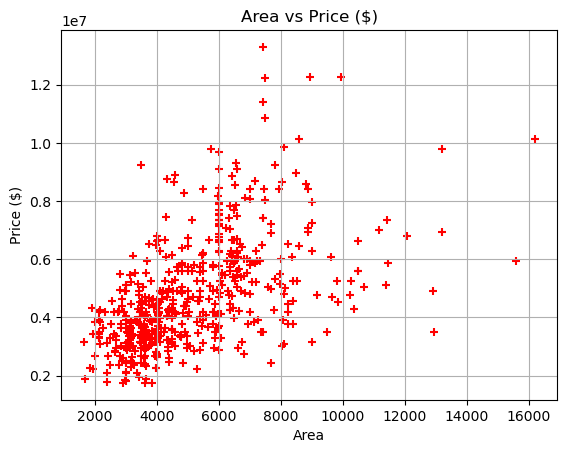

In [16]:
df2 = df['price']
plt.xlabel('Area')
plt.ylabel('Price ($)')
plt.title('Area vs Price ($)')
plt.scatter(df1['area'],df2,color='r',marker='+')
plt.grid()

In [17]:
df1.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,parking,furnishingstatus
0,13300000,7420,4,2,3,0,0,2,0
1,12250000,8960,4,4,4,0,0,3,0
2,12250000,9960,3,2,2,0,1,2,1
3,12215000,7500,4,2,2,0,1,3,0
4,11410000,7420,4,1,2,1,1,2,0


In [14]:
le_guestroom = LabelEncoder()
le_basement = LabelEncoder()
le_furnishingstatus = LabelEncoder()

In [15]:
df1['guestroom'] = le_guestroom.fit_transform(df['guestroom'])
df1['basement'] = le_basement.fit_transform(df['basement'])
df1['furnishingstatus'] = le_furnishingstatus.fit_transform(df['furnishingstatus'])
df1.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,parking,furnishingstatus
0,13300000,7420,4,2,3,0,0,2,0
1,12250000,8960,4,4,4,0,0,3,0
2,12250000,9960,3,2,2,0,1,2,1
3,12215000,7500,4,2,2,0,1,3,0
4,11410000,7420,4,1,2,1,1,2,0


In [21]:
x = df1.drop(['price'],axis='columns')
x.head()


,area,bedrooms,bathrooms,stories,guestroom,basement,parking,furnishingstatus
0,7420,4,2,3,0,0,2,0
1,8960,4,4,4,0,0,3,0
2,9960,3,2,2,0,1,2,1
3,7500,4,2,2,0,1,3,0
4,7420,4,1,2,1,1,2,0


In [23]:
y = df1.price
y.head()


0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split 

In [39]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.3)


In [40]:
len(X_test)

164

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [42]:
model.fit(X_train,y_train)

LinearRegression()

In [43]:
model.score(X_test,y_test)

0.5769793117294237

In [47]:
model.predict([[7420,4,1,3,0,0,3,1]])

E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6525505.76992895])